In [35]:
!pip install keras-tuner -q
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.regularizers import l1, l2, l1_l2
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from kerastuner.tuners import RandomSearch
import keras_tuner as kt



# ЛАБОРАТОРНА РОБОТА 8

Розробка нейронної мережі з використанням бібліотеки KERASS

### Завдання 1

Побудувати звичайну багатошарову нейронну мережу для датасету fashion mnist

Завантажити датасет

In [15]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Роздрукувати 10 зображень

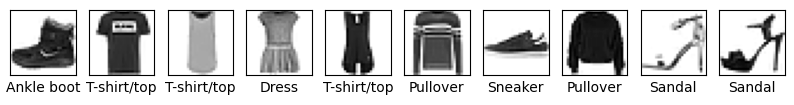

In [17]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


Підготувати дані, побудувати архітектуру.

In [19]:
train_images = train_images / 255.0
test_images = test_images / 255.0
     

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

C:\Users\prplct\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Вивести архітектуру моделі.

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Використати ранню зупинку і зменшення швидкості для запобіганню перенавчанню.

In [23]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
     

history = model.fit(train_images, train_labels, epochs=100,
                    validation_data=(test_images, test_labels),
                    callbacks=[
                                early_stopping,
                                reduce_lr
                               ])

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7529 - loss: 0.6948 - val_accuracy: 0.8408 - val_loss: 0.4212 - learning_rate: 0.0010
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8557 - loss: 0.3992 - val_accuracy: 0.8576 - val_loss: 0.3902 - learning_rate: 0.0010
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8746 - loss: 0.3465 - val_accuracy: 0.8646 - val_loss: 0.3718 - learning_rate: 0.0010
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8809 - loss: 0.3307 - val_accuracy: 0.8671 - val_loss: 0.3624 - learning_rate: 0.0010
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8863 - loss: 0.3117 - val_accuracy: 0.8787 - val_loss: 0.3353 - learning_rate: 0.0010
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8930 - loss: 0.2913 - val_accuracy: 0.8709 - val_loss: 0.3581 - learning_rate: 0.0010
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8

Зберегти модель на диск.

In [27]:
model.save('fashion_mnist_model.keras')

model.save('C:/Users/prplct/Desktop/роботи/fashion_mnist_model.keras')


Побудувати графіки функції втрат і точності для тренувальних і тестових даних

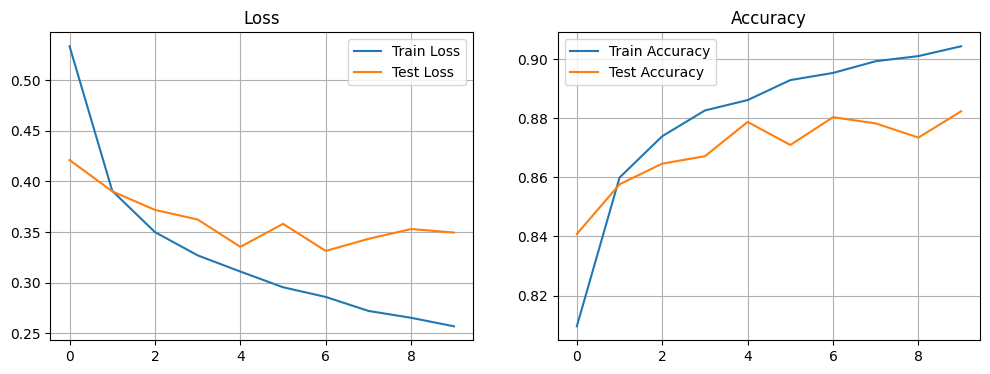

In [28]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

plt.show()

Вивести класифікаційний звіт.

In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
predictions = model.predict(test_images)

predicted_labels = np.argmax(predictions, axis=1)

print(classification_report(test_labels, predicted_labels, target_names=class_names))

313/313 - 0s - 754us/step - accuracy: 0.8803 - loss: 0.3313
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.84      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.74      0.85      0.79      1000
       Dress       0.86      0.91      0.88      1000
        Coat       0.83      0.71      0.77      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.72      0.67      0.70      1000
     Sneaker       0.92      0.97      0.95      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Результати розпізнавання із прогнозованим і справжнім класом

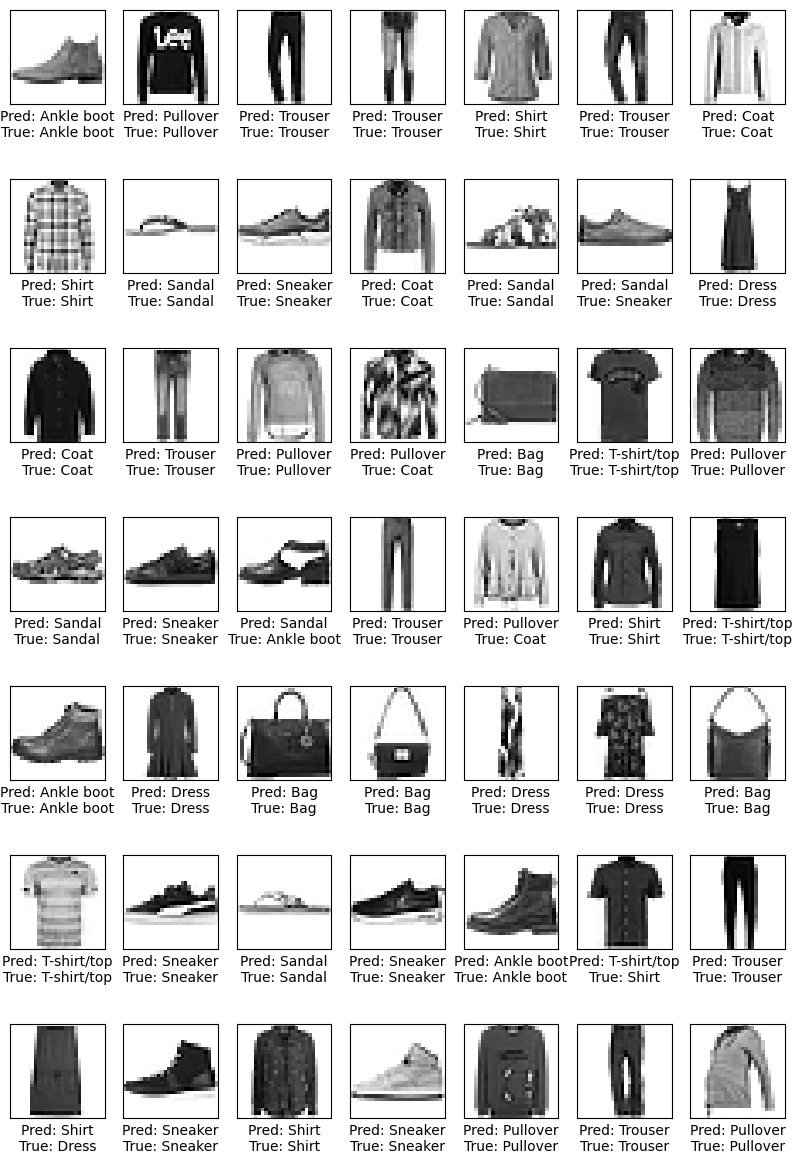

In [30]:
plt.figure(figsize=(10, 15))
rows, cols = 7, 7
for i in range(rows * cols):
    plt.subplot(rows, cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {class_names[predicted_labels[i]]}\nTrue: {class_names[test_labels[i]]}")
plt.show()

## Завдання 2
Побудувати нейронну мережу, аналогічну завданню 1 для датасета fashion mnist

Використати Keras Tuner підбору гіперпараметрів моделі.

In [32]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Нормалізуємо дані
x_train = x_train / 255.0
x_test = x_test / 255.0

In [39]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

    return model


In [36]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='fashion_mnist_tuning'
)


C:\Users\prplct\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Trial 30 Complete [00h 00m 23s]
val_accuracy: 0.8898000121116638

Best val_accuracy So Far: 0.8924000263214111
Total elapsed time: 00h 07m 02s


In [45]:
best_model = tuner.get_best_hyperparameters(num_trials=1)[0]

model = tuner.hypermodel.build(best_model)
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7908 - loss: 0.6033 - val_accuracy: 0.8524 - val_loss: 0.4068
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8704 - loss: 0.3503 - val_accuracy: 0.8613 - val_loss: 0.3741
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8851 - loss: 0.3083 - val_accuracy: 0.8709 - val_loss: 0.3660
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8939 - loss: 0.2842 - val_accuracy: 0.8667 - val_loss: 0.3668
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9005 - loss: 0.2637 - val_accuracy: 0.8786 - val_loss: 0.3411
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9072 - loss: 0.2508 - val_accuracy: 0.8775 - val_loss: 0.3448
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9110 - loss: 0.2306 - val_accuracy: 0.8899 - val_loss: 0.3208
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9179 - loss: 0.2134 - 

In [49]:
tuner.search(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr])

In [51]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 480)                 │         376,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         246,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 628,202 (2.40 MB)

 Trainable params: 628,202 (2.40 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
history = best_model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr])


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9248 - loss: 0.1961 - val_accuracy: 0.8894 - val_loss: 0.3412 - learning_rate: 3.3968e-04
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9292 - loss: 0.1884 - val_accuracy: 0.8904 - val_loss: 0.3285 - learning_rate: 3.3968e-04
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9330 - loss: 0.1751 - val_accuracy: 0.8882 - val_loss: 0.3497 - learning_rate: 3.3968e-04
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9378 - loss: 0.1644 - val_accuracy: 0.8787 - val_loss: 0.4064 - learning_rate: 3.3968e-04
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9388 - loss: 0.1604 - val_accuracy: 0.8938 - val_loss: 0.3420 - learning_rate: 3.3968e-04


In [53]:
test_loss, test_acc = best_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.8867 - loss: 0.3337
Test accuracy: 0.8903999924659729
Test loss: 0.3284795880317688


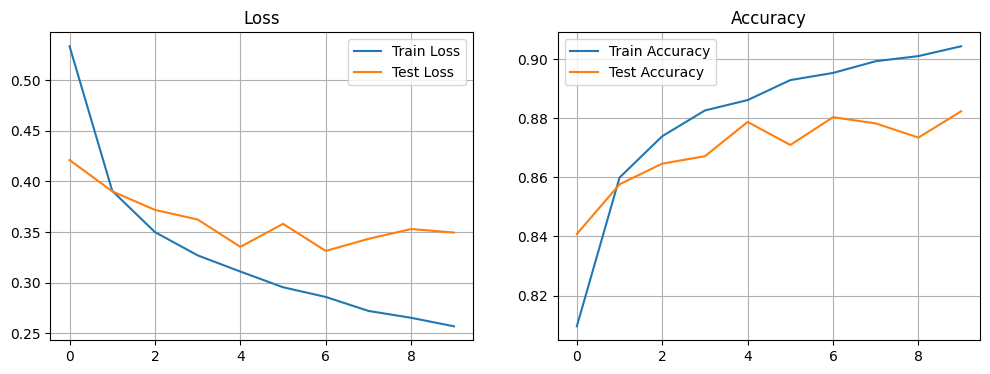

In [41]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.grid(True)
plt.legend()


In [54]:
test_loss, test_acc = best_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

predictions = best_model.predict(x_test)

predicted_labels = np.argmax(predictions, axis=1)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(classification_report(y_test, predicted_labels, target_names=class_names))
     

313/313 - 0s - 693us/step - accuracy: 0.8904 - loss: 0.3285
Test accuracy: 0.8903999924659729
Test loss: 0.3284795880317688
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.87      0.84      1000
     Trouser       0.98      0.99      0.98      1000
    Pullover       0.80      0.81      0.81      1000
       Dress       0.91      0.88      0.89      1000
        Coat       0.81      0.84      0.82      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.75      0.66      0.70      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.94      0.98      0.96      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



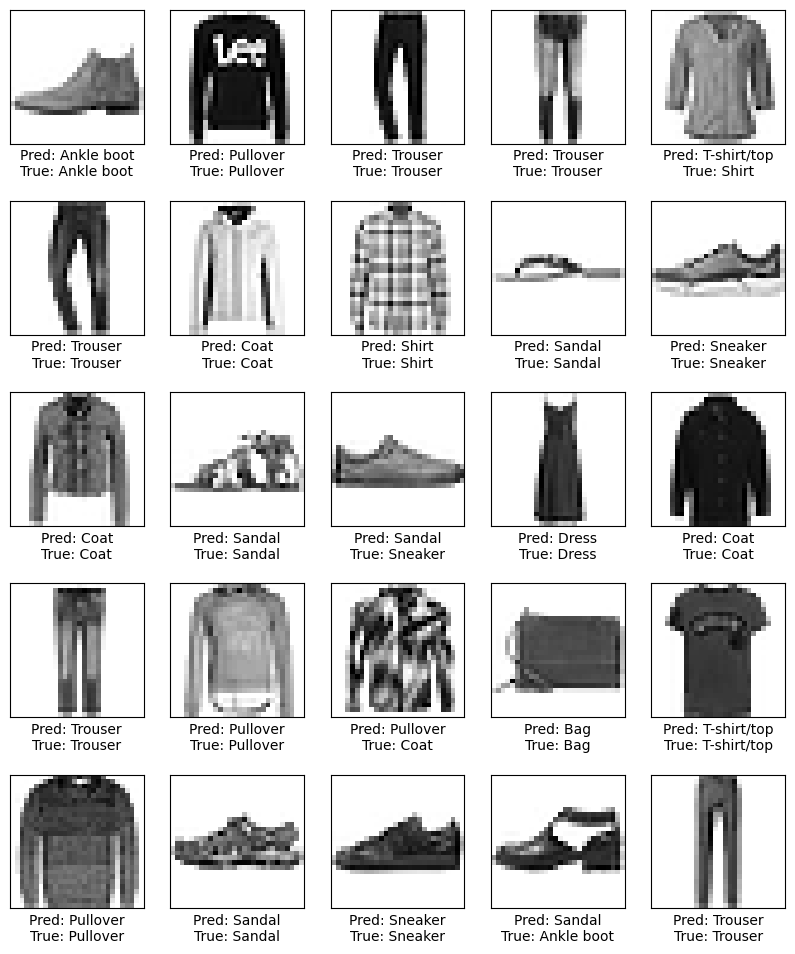

In [55]:
plt.figure(figsize=(10, 12))
rows, cols = 5, 5
for i in range(rows * cols):
    plt.subplot(rows, cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {class_names[predicted_labels[i]]}\nTrue: {class_names[y_test[i]]}")
plt.show()

# Висновки:
У результаті порівняння двох моделей було виявлено, що модель, налаштована за допомогою Keras Tuner, показала кращі результати.

Модель без налаштування гіперпараметрів досягла точності 0.87 з функцією втрат 0.34, тоді як модель, налаштована за допомогою тюнера, показала точність 0.89 і функцію втрат 0.30.

Це свідчить про те, що використання Keras Tuner для підбору гіперпараметрів дозволяє покращити продуктивність моделі. Незважаючи на свою простоту, модель з тюнером містить лише два шари (один прихований та один вихідний), вона демонструє кращу узгодженість з даними.